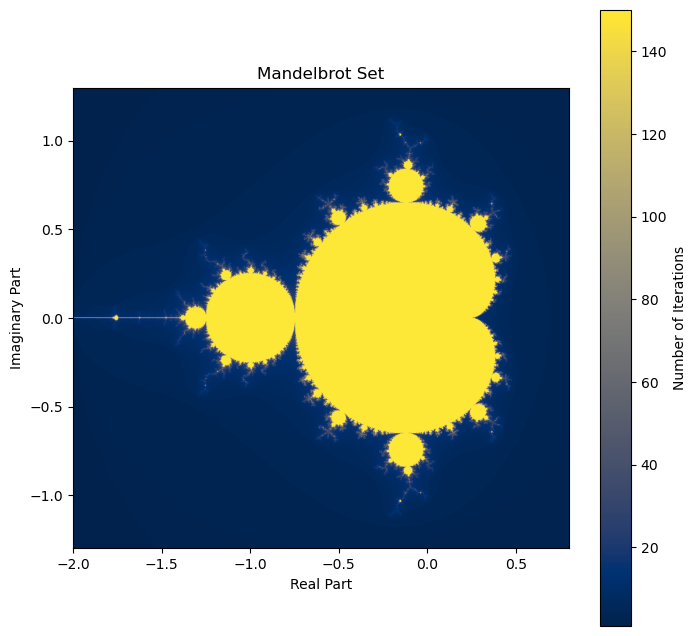

In [43]:
import numpy as np
import matplotlib.pyplot as plt

'''
EXERCISE 1
'''
# Define parameters
w, h = 1000, 1000 # Image size
x_min, x_max = -2.0, 0.8  # Range real part
y_min, y_max = -1.3, 1.3  # Range imaginary part
max_i = 150  # Maximum number of iterations

mandelbrot_set = np.zeros((h, w))

# Generate Mandelbrot set
for x in range(w):
    real = x_min + ((x / w) * (x_max - x_min))
    for y in range(h):
        # Give coordinates to complex number
        imag = y_min + ((y / h) * (y_max - y_min))
        c = complex(real, imag)

        # Initialize z
        z = complex()
        iter = 0

        # Run iterations
        while abs(z) <= 2 and iter < max_i:
            z = (z * z) + c
            iter += 1

        # Insert corresponding number of iterations in matrix
        mandelbrot_set[y, x] = iter

# Print picture
plt.figure(figsize = (8, 8))
plt.imshow(mandelbrot_set, extent = (x_min, x_max, y_min, y_max), cmap = 'cividis')
plt.colorbar(label = 'Number of Iterations')
plt.title("Mandelbrot Set")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.show()

In [ ]:
'''
EXERCISE 2
'''
def insidetheset(c, max_i):
    
    z = complex()
    
    for i in range(max_i):
        if abs(z) > 2:
            return False
        z = (z * z) + c

    return True

def area(x_min, x_max, y_min, y_max, s, i):

    total_area = (x_max - x_min) * (y_max - y_min)
    samples_in_area = 0

    for _ in range(s):
        real = np.random.uniform(x_min, x_max)
        imag = np.random.uniform(y_min, y_max)
        c = complex(real, imag)
        if insidetheset(c, i):
            samples_in_area += 1



In [ ]:
print("mi chiamo zucchini")